Import necessary libraries

In [1]:
import pandas as pd
import time
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Crawling data for selected tickers
tickers = ["QBTS", "LCID", "TSLA", "NVDA", "LYFT"]
#Determine start and end date
start_date = "2020-01-01"
end_date = datetime.now()

In [3]:
# Get raw file for each ticker
for ticker in tickers :

    # Dowload each ticker with yfinance library and time period = 1
    data = yf.download(ticker, start= start_date, end= end_date, interval= '1d')
    
    # Reset index 
    data.reset_index(inplace= True)
    data['Ticker'] = ticker
    data.to_csv(f"{ticker}.csv",index = False)
    time.sleep(2)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# EDA

In [4]:
# Combined data
combined_data = pd.DataFrame()
for t in tickers:
    df = pd.read_csv(f"{t}.csv")
    combined_data = pd.concat([combined_data,df.drop(0)])
combined_data.head()

,Date,Close,High,Low,Open,Volume,Ticker
1,2020-12-11,10.149999618530273,10.899999618530273,10.0,10.25,119400,QBTS
2,2020-12-14,10.15999984741211,10.59000015258789,10.149999618530273,10.59000015258789,368700,QBTS
3,2020-12-15,10.109999656677246,10.300000190734863,10.069999694824219,10.25,193700,QBTS
4,2020-12-16,10.140000343322754,10.25,10.100000381469727,10.15999984741211,354900,QBTS
5,2020-12-17,10.199999809265137,10.279999732971191,10.15999984741211,10.15999984741211,115500,QBTS


In [5]:
# path = 'TSLA.csv'
# data = pd.read_csv(path)
# data.describe().T

In [6]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6316 entries, 1 to 1347
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    6316 non-null   object
 1   Close   6316 non-null   object
 2   High    6316 non-null   object
 3   Low     6316 non-null   object
 4   Open    6316 non-null   object
 5   Volume  6316 non-null   object
 6   Ticker  6316 non-null   object
dtypes: object(7)
memory usage: 394.8+ KB


In [7]:
combined_data.describe().T

,count,unique,top,freq
Date,6316,1347,2025-05-07,5
Close,6316,4799,9.880000114440918,38
High,6316,5032,9.899999618530273,47
Low,6316,4948,9.880000114440918,31
Open,6316,4877,9.880000114440918,37
Volume,6316,6257,42200,3
Ticker,6316,5,TSLA,1347


Transform Close	High	Low	Open	Volume	in data 


In [8]:
numeric_cols = ['Close','High','Low','Open','Volume']
for c in numeric_cols:
    combined_data[c] = pd.to_numeric(combined_data[c],errors ='coerce')

In [9]:
combined_data.isnull().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
Ticker    0
dtype: int64

In [10]:
combined_data.duplicated().sum()

np.int64(0)

check outlier

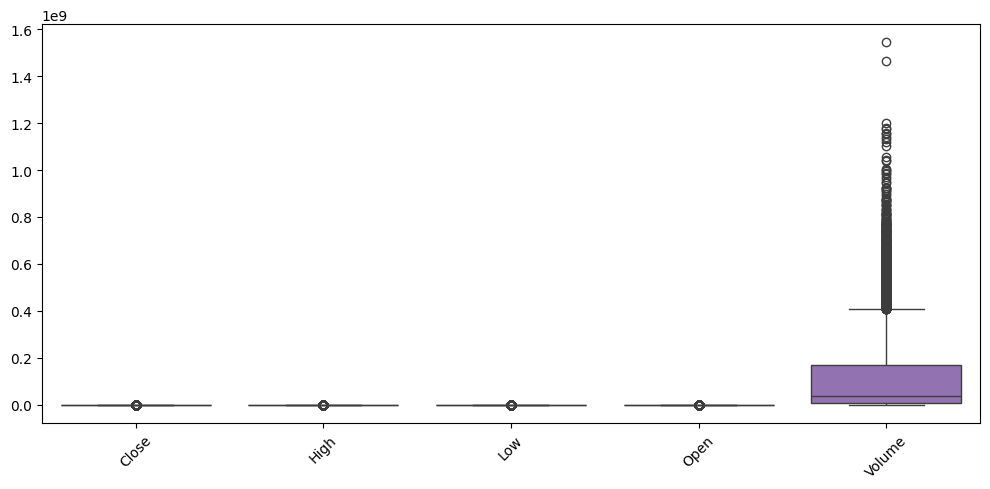

In [11]:
plt.figure(figsize = (10,5))
sns.boxplot(data = combined_data)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

relation between numeric columns

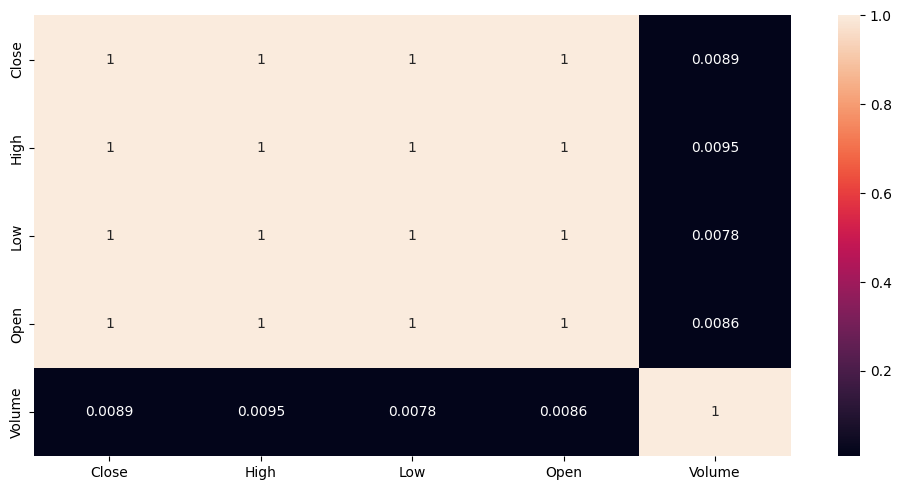

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(combined_data[numeric_cols].corr(),annot= True)
plt.tight_layout()
plt.show()

# preprocess

In [13]:
def preprocess_yfinane(df :pd.DataFrame, name :str)-> pd.DataFrame:
    """
    This will preprocess yfinance data by dropping the first row, 
    dropping date column, transforming numberic columns to float 
    and applying Minmax normalisation.

    Args:
    df (pd.DataFrame) : Input a Dataframe for each ticker data

    Returns:
        pd.DataFrame : Preprocessed DataFrame
    """

    #copy df for not changing
    df_processed = df.copy()
    
    # dropping the first row
    df_processed = df_processed.drop(0).reset_index(drop=True)

    #Convert date to datetime
    df_processed = df_processed.drop('Date', axis = 1)

    #Transform numeric columns
    df_processed[numeric_cols] = df_processed[numeric_cols].astype(float)
    
    #Minmax normalisation for numic_rols (Except target variables)
    cols = ['High','Low','Open','Volume']
    scaler = MinMaxScaler()
    df_processed[cols] = scaler.fit_transform(df_processed[cols])

    # Output csv file
    df_processed.to_csv(f"{name}_preprocess.csv")

    return df_processed



In [14]:
for t in tickers:
    data = pd.read_csv(f'{t}.csv')
    data_preprocessed = preprocess_yfinane(data,F'{t}') 
    